In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
data = pd.read_csv("C:/Users/PAVILION/Downloads/diabetes_012_health_indicators_BRFSS2015.csv")

In [3]:
data.head(11)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


In [4]:
data.shape

(253680, 22)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [6]:
data.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [7]:
data["Diabetes_012"]

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
253675    0.0
253676    2.0
253677    0.0
253678    0.0
253679    2.0
Name: Diabetes_012, Length: 253680, dtype: float64

In [8]:
# Check for missing values
data.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [9]:
# Check for duplicate rows
data.duplicated().sum()

23899

In [10]:
# Remove duplicate rows 
data1= data.drop_duplicates()

In [11]:
data1.shape

(229781, 22)

In [12]:
# Explore data using descriptive statistics
data1.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,229781.000000,229781.000000,229781.000000,229781.000000,229781.00000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,...,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000
mean,0.325627,0.454441,0.441760,0.959535,28.68567,0.465661,0.044756,0.103216,0.733355,0.612966,...,0.946075,0.092810,2.601151,3.505373,4.675178,0.185507,0.439231,8.086582,4.980568,5.890383
std,0.724623,0.497921,0.496598,0.197047,6.78636,0.498821,0.206767,0.304241,0.442206,0.487073,...,0.225871,0.290167,1.064685,7.713725,9.046568,0.388709,0.496295,3.093809,0.992895,2.092477
min,0.000000,0.000000,0.000000,0.000000,12.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.00000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,6.000000
75%,0.000000,1.000000,1.000000,1.000000,32.00000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,4.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [13]:
data1.skew()

Diabetes_012            1.825616
HighBP                  0.182997
HighChol                0.234559
CholCheck              -4.664269
BMI                     2.063938
Smoker                  0.137683
Stroke                  4.403481
HeartDiseaseorAttack    2.608378
PhysActivity           -1.055421
Fruits                 -0.463862
Veggies                -1.460067
HvyAlcoholConsump       3.679207
AnyHealthcare          -3.949859
NoDocbcCost             2.806616
GenHlth                 0.352020
MentHlth                2.546808
PhysHlth                2.046245
DiffWalk                1.618154
Sex                     0.244892
Age                    -0.385147
Education              -0.691196
Income                 -0.781619
dtype: float64

Outliers in Age: Series([], Name: Age, dtype: float64)


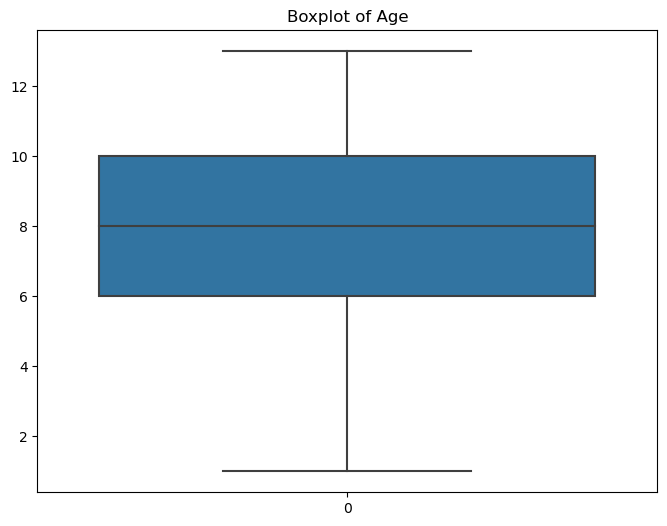

Outliers in BMI: 85        45.0
97        45.0
156       47.0
188       43.0
201       55.0
          ... 
253547    44.0
253557    42.0
253567    44.0
253673    42.0
253675    45.0
Name: BMI, Length: 9847, dtype: float64


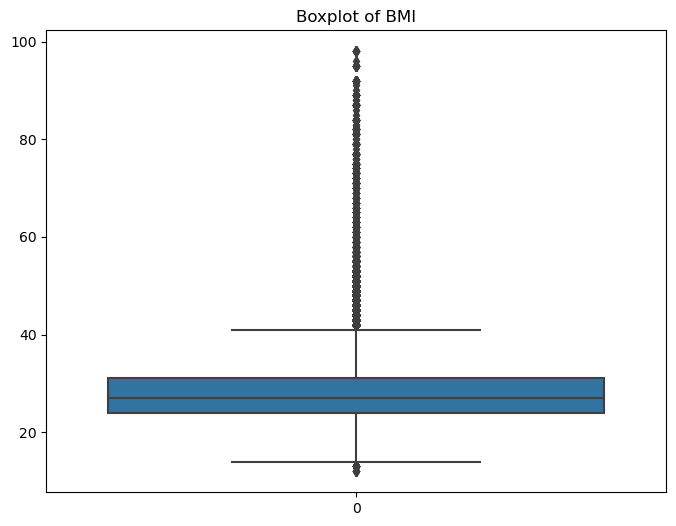

In [14]:
# Numerical columns for outlier detection
numerical_cols = ['Age', 'BMI']

# Function to detect outliers using IQR method
def detect_outliers_iqr(data1):
    q1, q3 = np.percentile(data1, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data1[(data1 < lower_bound) | (data1 > upper_bound)]
    return outliers

# Detect outliers in each numerical column
for col in numerical_cols:
    outliers = detect_outliers_iqr(data[col])
    print(f"Outliers in {col}: {outliers}")

    # Visualize outliers using boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [15]:
print(data.columns)

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


Skewness of BMI: 2.063938014894699


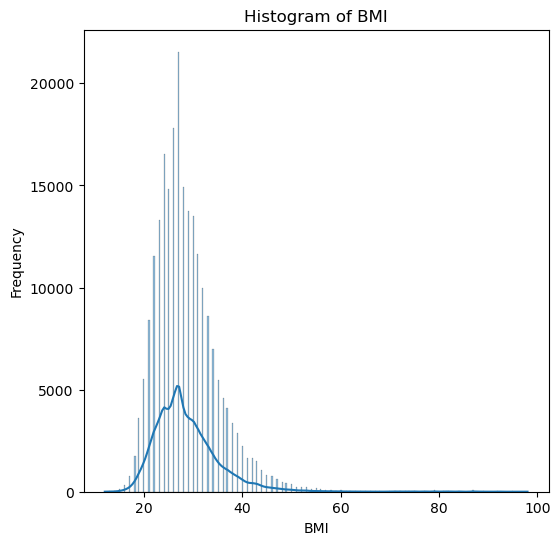

Skewness of Age: -0.38514720011877446


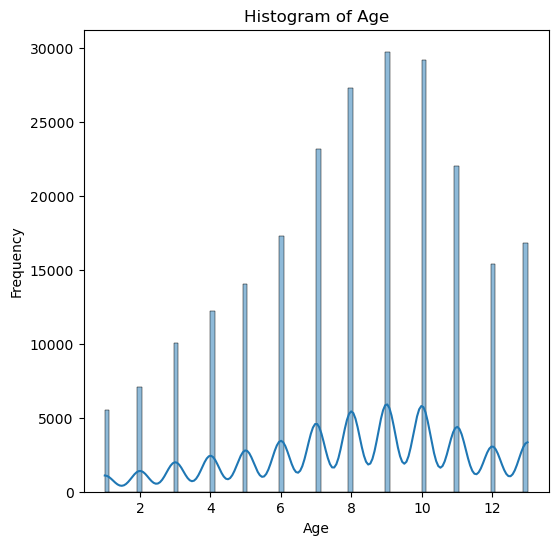

In [16]:
# Numerical columns for skewness check
numerical_cols = ['BMI', 'Age']

# Calculate and print skewness for each numerical column
for col in numerical_cols:
    skewness = data1[col].skew()
    print(f"Skewness of {col}: {skewness}")

    # Visualize the distribution using a histogram
    plt.figure(figsize=(6, 6))
    sns.histplot(data1[col], kde=True)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [17]:
data_log = np.log(data1 + 1)  # Adding 1 to handle zero values
data_log.skew()

Diabetes_012            1.787224
HighBP                  0.182997
HighChol                0.234559
CholCheck              -4.664269
BMI                     0.668314
Smoker                  0.137683
Stroke                  4.403481
HeartDiseaseorAttack    2.608378
PhysActivity           -1.055421
Fruits                 -0.463862
Veggies                -1.460067
HvyAlcoholConsump       3.679207
AnyHealthcare          -3.949859
NoDocbcCost             2.806616
GenHlth                -0.274416
MentHlth                1.380692
PhysHlth                1.104643
DiffWalk                1.618154
Sex                     0.244892
Age                    -1.350416
Education              -1.270663
Income                 -1.451469
dtype: float64

In [18]:
data_sqrt = np.sqrt(data1)

In [19]:

from scipy.stats import boxcox



# Identify a skewed feature (e.g., 'Age')
skewness = data['Age'].skew()
print(f"Skewness of Age: {skewness}")

# Apply Box-Cox transformation
data['Age_transformed'], _ = boxcox(data['Age'])

# Check the skewness after transformation
skewness_transformed = data['Age_transformed'].skew()
print(f"Skewness of Age (transformed): {skewness_transformed}")

Skewness of Age: -0.35990324786631667
Skewness of Age (transformed): -0.20067456626092492


Skewness of Age: -0.35990324786631667
Skewness of Age after transformation: -0.35990324786631667


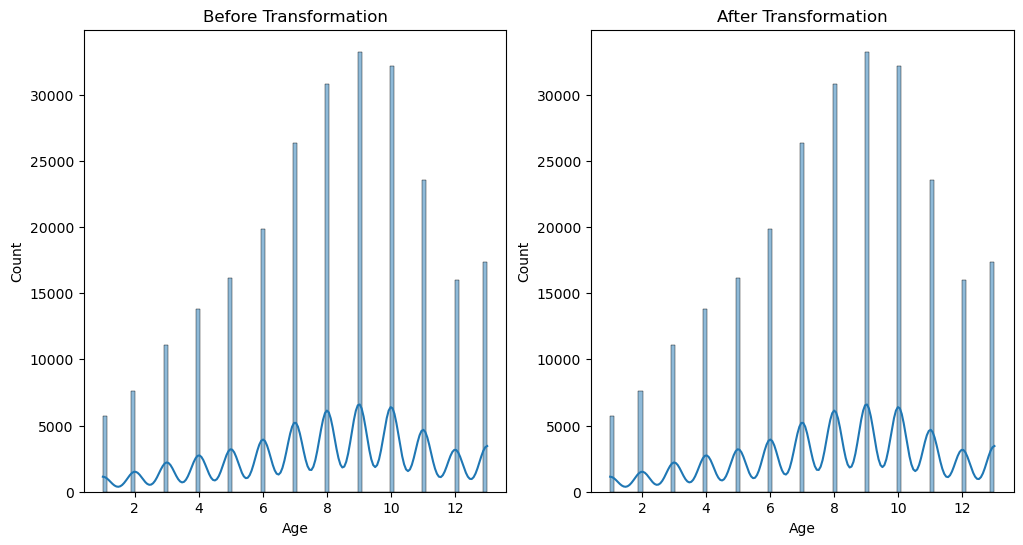

In [20]:
# Numerical column to check for skewness (e.g., 'Age')
column_name = 'Age'
 
# Check skewness
skewness = data[column_name].skew()
print(f"Skewness of {column_name}: {skewness}")

# Apply logarithmic transformation if skewness is significant
if skewness > 1:  # Adjust the threshold as needed
    data[column_name] = np.log1p(data[column_name])

# Re-check skewness after transformation
skewness_after_transform = data[column_name].skew()
print(f"Skewness of {column_name} after transformation: {skewness_after_transform}")

# Visualize the distribution before and after transformation
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data[column_name], kde=True)
plt.title('Before Transformation')

plt.subplot(1, 2, 2)
sns.histplot(data[column_name], kde=True)
plt.title('After Transformation')

plt.show()

Initial skewness of BMI: 2.122003758291108
Skewness of BMI after log transformation: 0.6900835748641594


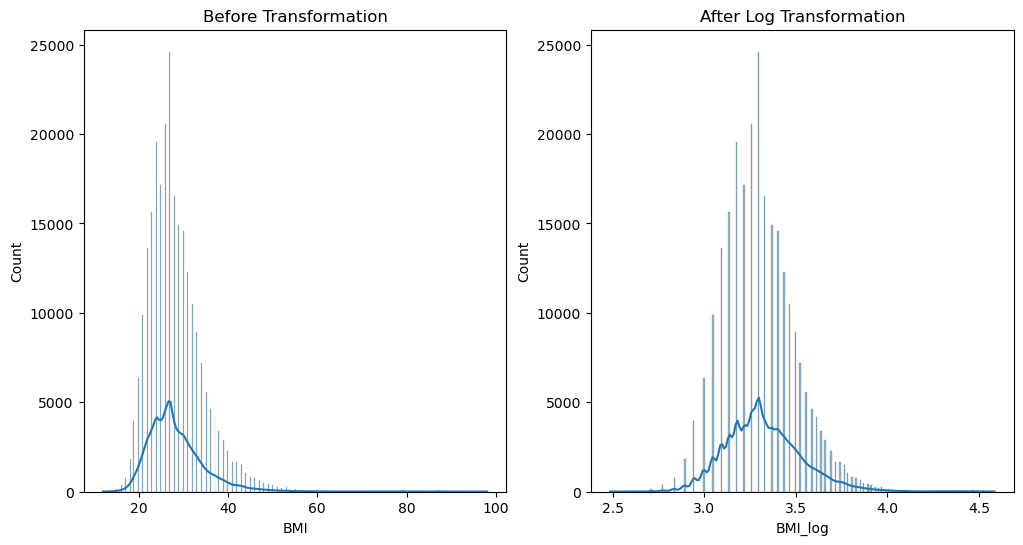

In [21]:


# Check the initial skewness
initial_skewness = data['BMI'].skew()
print(f"Initial skewness of BMI: {initial_skewness}")

# Apply logarithmic transformation
data['BMI_log'] = np.log(data['BMI'])

# Check the skewness after transformation
transformed_skewness = data['BMI_log'].skew()
print(f"Skewness of BMI after log transformation: {transformed_skewness}")

# Visualize the distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['BMI'], kde=True)
plt.title('Before Transformation')

plt.subplot(1, 2, 2)
sns.histplot(data['BMI_log'], kde=True)
plt.title('After Log Transformation')

plt.show()

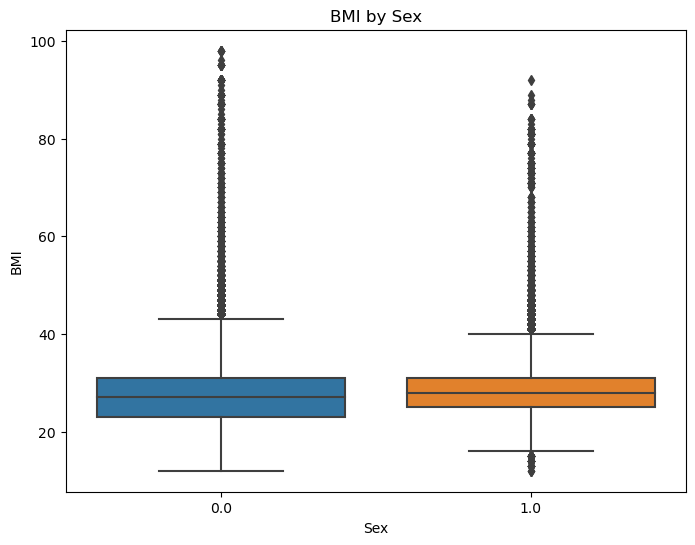

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sex', y='BMI', data=data)
plt.title('BMI by Sex')
plt.show()

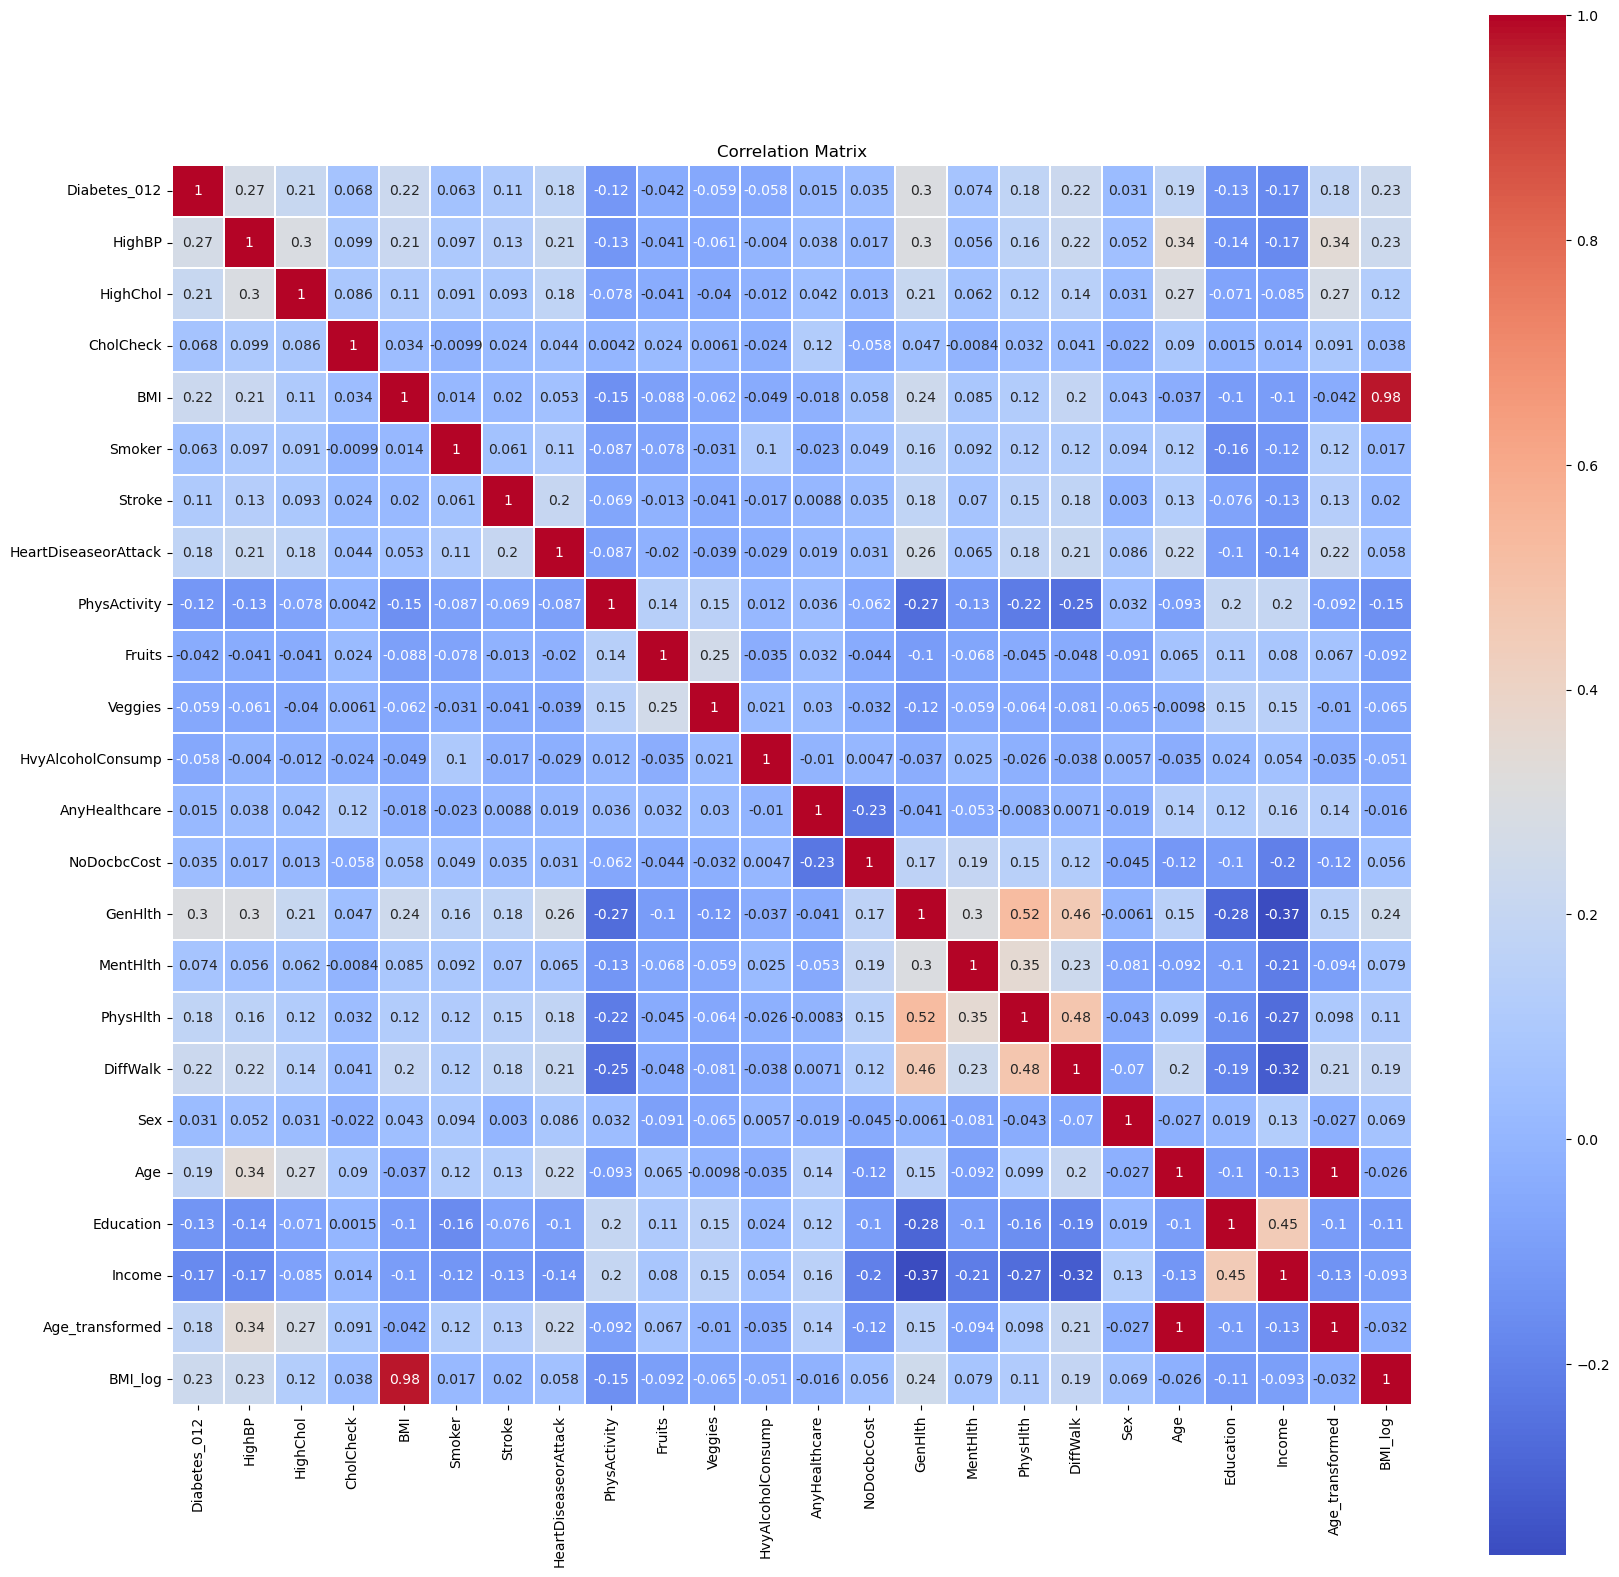

In [23]:
corr_matrix = data.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',square=True,linewidths=.25)
plt.title('Correlation Matrix')
plt.show()

In [24]:
corr_matrix = data.corr()
corr_matrix

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Age_transformed,BMI_log
Diabetes_012,1.000000,0.271596,0.209085,0.067546,0.224379,0.062914,0.107179,0.180272,-0.121947,-0.042192,...,0.302587,0.073507,0.176287,0.224239,0.031040,0.185026,-0.130517,-0.171483,0.184023,0.233860
HighBP,0.271596,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.209361,-0.125267,-0.040555,...,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235,0.344192,0.231216
HighChol,0.209085,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.180765,-0.078046,-0.040859,...,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459,0.269173,0.122743
CholCheck,0.067546,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.044206,0.004190,0.023849,...,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259,0.091095,0.038143
BMI,0.224379,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.052904,-0.147294,-0.087518,...,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069,-0.042069,0.977974
Smoker,0.062914,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.114441,-0.087401,-0.077666,...,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937,0.118912,0.016502
Stroke,0.107179,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.203002,-0.069151,-0.013389,...,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599,0.128636,0.020240
HeartDiseaseorAttack,0.180272,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,1.000000,-0.087299,-0.019790,...,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011,0.224715,0.057645
PhysActivity,-0.121947,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.087299,1.000000,0.142756,...,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539,-0.092295,-0.146942
Fruits,-0.042192,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.019790,0.142756,1.000000,...,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929,0.066522,-0.092062


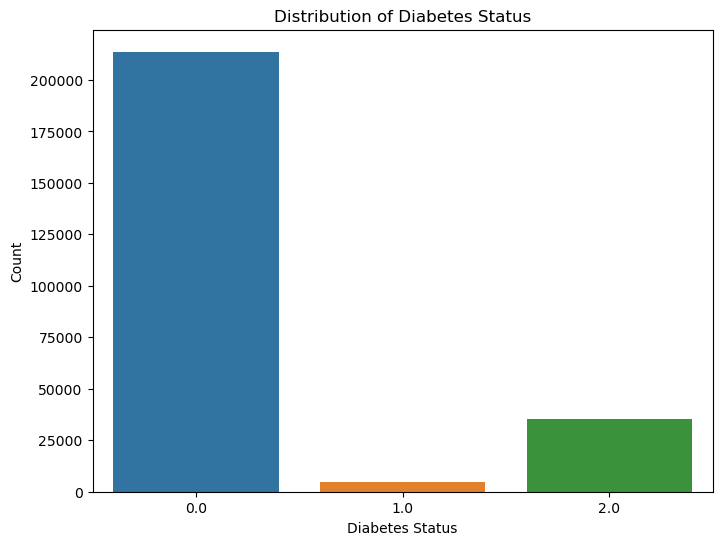

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Diabetes_012', data=data)
plt.title('Distribution of Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Count')
plt.show()

C:\Users\PAVILION\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


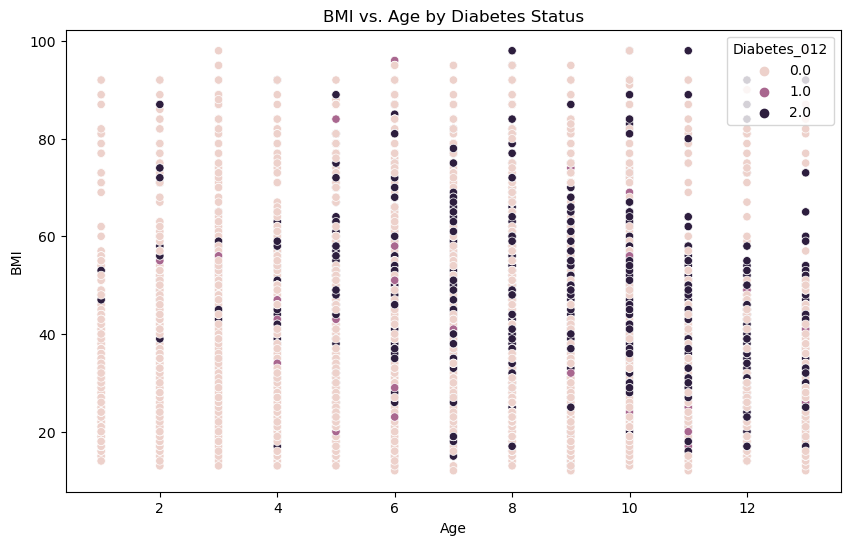

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='BMI', data=data, hue='Diabetes_012')
plt.title('BMI vs. Age by Diabetes Status')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

In [27]:
# Split the data into features (X) and target variable (y)
X = data.drop('Diabetes_012', axis=1)
y = data['Diabetes_012']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Select the top 10 features using f_classif
selector = SelectKBest(score_func=f_classif, k=10)
selector.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[selector.get_support()]

# Create new DataFrames with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]